# Winwin, Batch 01 Milestone 1

# Import Package

In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocess

In [2]:
df = pd.read_csv('bank-additional-full.csv',sep=';')

In [3]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

Checking out the statistical parameters

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Checking out the categories and their respective counts in each feature

In [6]:
print("Job:",df.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",df.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",df.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",df.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",df.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",df.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",df.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",df.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",df.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",df.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",df.y.value_counts(),sep = '\n')
print("-"*40)

Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------------------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes        21576
no         18622
unknown      

# Data Cleaning

Checking for missing values

In [7]:
print('Data columns with null values:',df.isnull().sum(), sep = '\n')

Data columns with null values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


# Data Transform

In [8]:
col_edit = df['marital']
col_edit = col_edit.apply(lambda x:3 if x =='unknown' else x)
col_edit = col_edit.apply(lambda x:2 if x =='divorced' else x)
col_edit = col_edit.apply(lambda x:1 if x =='married' else x)
col_edit = col_edit.apply(lambda x:0 if x =='single' else x)
col_edit = col_edit.fillna(0)

In [9]:
maritals = pd.get_dummies(df['marital'].fillna('never'))

In [10]:
df_new = pd.concat([df,maritals],axis=1)

In [11]:
df_new = df
df['maritals']=col_edit

In [12]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,maritals
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1


In [13]:
col_edit = df['housing']
col_edit = col_edit.apply(lambda x:2 if x =='unknown' else x)
col_edit = col_edit.apply(lambda x:1 if x =='yes' else x)
col_edit = col_edit.apply(lambda x:0 if x =='no' else x)
col_edit = col_edit.fillna(0)

In [14]:
new_house = pd.get_dummies(df['housing'].fillna('never'))

In [15]:
df_new = pd.concat([df,new_house],axis=1)

In [16]:
df_new = df
df['house_loan']=col_edit

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,maritals,house_loan
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0


In [18]:
col_edit = df['loan']
col_edit = col_edit.apply(lambda x:2 if x =='unknown' else x)
col_edit = col_edit.apply(lambda x:1 if x =='yes' else x)
col_edit = col_edit.apply(lambda x:0 if x =='no' else x)
col_edit = col_edit.fillna(0)

In [19]:
new_loan = pd.get_dummies(df['loan'].fillna('never'))

In [20]:
df_new = pd.concat([df,new_loan],axis=1)

In [21]:
df_new = df
df['personal_loan']=col_edit

In [22]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,maritals,house_loan,personal_loan
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1


In [23]:
col_edit = df['education']
col_edit = col_edit.apply(lambda x:7 if x =='university.degree' else x)
col_edit = col_edit.apply(lambda x:6 if x =='high.school' else x)
col_edit = col_edit.apply(lambda x:5 if x =='basic.9y' else x)
col_edit = col_edit.apply(lambda x:4 if x =='professional.course' else x)
col_edit = col_edit.apply(lambda x:3 if x =='basic.4y' else x)
col_edit = col_edit.apply(lambda x:2 if x =='basic.6y' else x)
col_edit = col_edit.apply(lambda x:1 if x =='unknown' else x)
col_edit = col_edit.apply(lambda x:0 if x =='illiterate' else x)
col_edit = col_edit.fillna(0)

In [24]:
new_edu = pd.get_dummies(df['education'].fillna('never'))

In [25]:
df_new = pd.concat([df,new_edu],axis=1)

In [26]:
df_new = df
df['educations']=col_edit

In [27]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,maritals,house_loan,personal_loan,educations
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,3
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,6
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,1,0,6
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,2
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1,6


In [28]:
col_edit = df['contact']
col_edit = col_edit.apply(lambda x:1 if x =='cellular' else x)
col_edit = col_edit.apply(lambda x:0 if x =='telephone' else x)
col_edit = col_edit.fillna(0)

In [29]:
new_cont = pd.get_dummies(df['contact'].fillna('never'))

In [30]:
df_new = pd.concat([df,new_cont],axis=1)

In [31]:
df_new = df
df['contacts']=col_edit

In [32]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,maritals,house_loan,personal_loan,educations,contacts
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,1,0,0,3,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,1,0,0,6,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,1,1,0,6,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,1,0,0,2,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,1,0,1,6,0


In [33]:
col_edit = df['job']
col_edit = col_edit.apply(lambda x:11 if x =='admin.' else x)
col_edit = col_edit.apply(lambda x:10 if x =='blue-collar' else x)
col_edit = col_edit.apply(lambda x:9 if x =='technician' else x)
col_edit = col_edit.apply(lambda x:8 if x =='services' else x)
col_edit = col_edit.apply(lambda x:7 if x =='management' else x)
col_edit = col_edit.apply(lambda x:6 if x =='retired' else x)
col_edit = col_edit.apply(lambda x:5 if x =='entrepreneur' else x)
col_edit = col_edit.apply(lambda x:4 if x =='self-employed' else x)
col_edit = col_edit.apply(lambda x:3 if x =='housemaid' else x)
col_edit = col_edit.apply(lambda x:2 if x =='unemployed' else x)
col_edit = col_edit.apply(lambda x:1 if x =='student' else x)
col_edit = col_edit.apply(lambda x:0 if x =='unknown' else x)
col_edit = col_edit.fillna(0)

In [34]:
new_job = pd.get_dummies(df['job'].fillna('never'))

In [35]:
df_new = pd.concat([df,new_job],axis=1)

In [36]:
df_new = df
df['jobs']=col_edit

In [37]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.conf.idx,euribor3m,nr.employed,y,maritals,house_loan,personal_loan,educations,contacts,jobs
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,1,0,0,3,0,3
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,1,0,0,6,0,8
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,1,1,0,6,0,8
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,1,0,0,2,0,11
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,-36.4,4.857,5191.0,no,1,0,1,6,0,8


In [38]:
df = df[['age','maritals','house_loan','personal_loan',
        'educations','contacts','jobs']]
df.head()

,age,maritals,house_loan,personal_loan,educations,contacts,jobs
0,56,1,0,0,3,0,3
1,57,1,0,0,6,0,8
2,37,1,1,0,6,0,8
3,40,1,0,0,2,0,11
4,56,1,0,1,6,0,8


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 7 columns):
age              41188 non-null int64
maritals         41188 non-null int64
house_loan       41188 non-null int64
personal_loan    41188 non-null int64
educations       41188 non-null int64
contacts         41188 non-null int64
jobs             41188 non-null int64
dtypes: int64(7)
memory usage: 2.2 MB


In [40]:
df = df.astype('float')

# Check Correlation

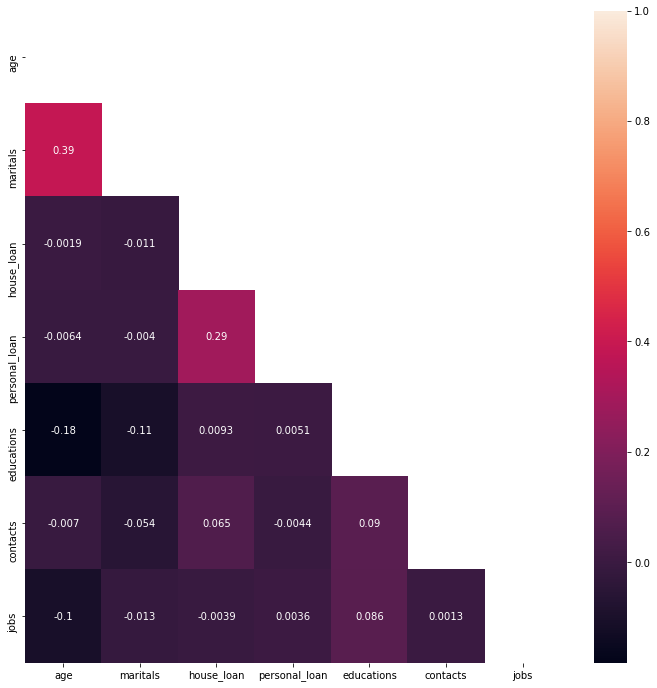

In [41]:
import seaborn as sb
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,12))
sb.heatmap(df.corr(),annot=True, mask=np.triu(df.corr()))

Dari hasil heatmap, feature personal_house, educations & contacts terhadap house_loan memiliki nilai yang tinggi sehingga saya memilih features tersebut

In [42]:
feature_cols = ['personal_loan',
        'educations','contacts']
X = df[feature_cols]
y = df['house_loan']

# Split data

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=69)

Split data: 80% = train, 20% = validation

# Scaling

In [44]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train) 

# Create model and train

Untuk model saya akan membandingkan model logistic regression, SVC yang mengunakan RBF,  untuk melihat pengaruh kernel tersebut pada akurasi dibanding tanpa kernel (linear). Dan pada kernel RBF saya akan menggunakan nilai C = 1 untuk mengetahui efek gap dari nilai C tersebut terhadap akurasi yang diperoleh.

Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver="lbfgs", random_state=69)
%time model_lr.fit(X_train_trf, y_train)

D:\program 2\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Wall time: 360 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=69, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

SVC, kernel RBF, C=1

In [46]:
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf', random_state=69,C=1)
%time model_svc.fit(X_train_trf, y_train)

Wall time: 36.8 s


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=69,
    shrinking=True, tol=0.001, verbose=False)

Decision Tree, max depth=4

In [47]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
%time tree_clf.fit(X_train_trf, y_train)

Wall time: 9.76 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

Decision Tree Classifier Hyperparameter tuning

In [48]:
#fungsi print_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 964 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 1864 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 2964 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 4264 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 5764 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 7464 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 9364 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 11464 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:  2.1min finished


Best paramters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

Random Forest, estimator=100 

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train_trf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Random Forest hyperparameter tuning,
Randomized Search Cross Validation

In [51]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]



params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)


Fitting 3 folds for each of 768 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed: 48.7min finished


Best parameters: {'bootstrap': False, 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

KNN, n-neignours=8

In [52]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
import matplotlib.pyplot as plt

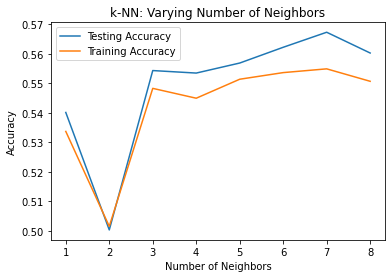

In [53]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_val, y_val)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [54]:
# Create a k-NN classifier with 8 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=8)

# Fit the classifier to the data
knn.fit(X_train, y_train)

y_pred = knn.predict(X_val)

Naive Bayes

In [70]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_val)

Gradien Boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
grad_boost_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Dari waktu komputasi decision Tree adalah yang paling tercepat, sedangkan model Rando Forest dengan hyper parameter tuning adalah yang paling lama

# Model Analysis

Performance Evaluation

In [55]:
X_val_trf = scaler.transform(X_val) 

Logistic Regression

In [56]:
%time y_val_predict = model_lr.predict(X_val_trf)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

Wall time: 125 ms
              precision    recall  f1-score   support

         0.0       0.54      0.36      0.43      3680
         1.0       0.58      0.73      0.65      4361
         2.0       1.00      1.00      1.00       197

    accuracy                           0.57      8238
   macro avg       0.70      0.70      0.69      8238
weighted avg       0.57      0.57      0.56      8238



In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
y_val_pred = model_lr.predict(X_val_trf)
cm = confusion_matrix(y_val, y_val_pred)
print(cm)

[[1331 2349    0]
 [1156 3205    0]
 [   0    0  197]]


SVC, kernel RBF, C=1

In [61]:
%time y_val_predict = model_svc.predict(X_val_trf)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

Wall time: 4.85 s
              precision    recall  f1-score   support

         0.0       0.54      0.36      0.43      3680
         1.0       0.58      0.73      0.65      4361
         2.0       1.00      1.00      1.00       197

    accuracy                           0.57      8238
   macro avg       0.70      0.70      0.69      8238
weighted avg       0.57      0.57      0.56      8238



In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
y_val_pred = model_svc.predict(X_val_trf)
cm = confusion_matrix(y_val, y_val_pred)
print(cm)

[[1331 2349    0]
 [1156 3205    0]
 [   0    0  197]]


Decision Tree, max depth=4

In [63]:
%time y_val_predict = tree_clf.predict(X_val_trf)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

Wall time: 1.95 ms
              precision    recall  f1-score   support

         0.0       0.54      0.36      0.43      3680
         1.0       0.57      0.55      0.56      4361
         2.0       0.13      1.00      0.23       197

    accuracy                           0.48      8238
   macro avg       0.41      0.64      0.41      8238
weighted avg       0.54      0.48      0.49      8238



In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
y_val_pred = tree_clf.predict(X_val_trf)
cm = confusion_matrix(y_val, y_val_pred)
print(cm)

[[1331 1849  500]
 [1156 2406  799]
 [   0    0  197]]


Decision Tree Classifier Hyperparameter tuning

In [65]:
print_score(tree_clf, X_train, y_train, X_val, y_val, train=True)
print_score(tree_clf, X_train, y_train, X_val, y_val, train=False)

Train Result:
Accuracy Score: 55.91%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0    2.0  accuracy     macro avg  \
f1-score       0.453893      0.614801    1.0   0.55912      0.689565   
precision      0.517797      0.565567    1.0   0.55912      0.694455   
recall         0.404029      0.673424    1.0   0.55912      0.692484   
support    14942.000000  17215.000000  793.0   0.55912  32950.000000   

           weighted avg  
f1-score       0.551104  
precision      0.554360  
recall         0.559120  
support    32950.000000  
_______________________________________________
Confusion Matrix: 
 [[ 6037  8905     0]
 [ 5622 11593     0]
 [    0     0   793]]

Test Result:
Accuracy Score: 56.69%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0    2.0  accuracy    macro avg  \
f1-score      0.462327     0.622274    1.0  0.566885     0.694867   
precision     0.518945 

Random Forest, estimator=100

In [66]:
print_score(rf_clf, X_train, y_train, X_val, y_val, train=True)
print_score(rf_clf, X_train, y_train, X_val, y_val, train=False)

Train Result:
Accuracy Score: 56.26%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0    2.0  accuracy     macro avg  \
f1-score       0.420833      0.634492    1.0   0.56261      0.685108   
precision      0.526655      0.563088    1.0   0.56261      0.696581   
recall         0.350422      0.726634    1.0   0.56261      0.692352   
support    14942.000000  17215.000000  793.0   0.56261  32950.000000   

           weighted avg  
f1-score       0.546399  
precision      0.557081  
recall         0.562610  
support    32950.000000  
_______________________________________________
Confusion Matrix: 
 [[ 5236  9706     0]
 [ 4706 12509     0]
 [    0     0   793]]

Test Result:
Accuracy Score: 57.45%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0    2.0  accuracy    macro avg  \
f1-score      0.431652     0.646495    1.0  0.574533     0.692716   
precision     0.535183 

Random Forest hyperparameter tuning, Randomized Search Cross Validation

In [67]:
print_score(rf_clf, X_train, y_train, X_val, y_val, train=True)
print_score(rf_clf, X_train, y_train, X_val, y_val, train=False)

Train Result:
Accuracy Score: 56.26%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0    2.0  accuracy     macro avg  \
f1-score       0.420833      0.634492    1.0   0.56261      0.685108   
precision      0.526655      0.563088    1.0   0.56261      0.696581   
recall         0.350422      0.726634    1.0   0.56261      0.692352   
support    14942.000000  17215.000000  793.0   0.56261  32950.000000   

           weighted avg  
f1-score       0.546399  
precision      0.557081  
recall         0.562610  
support    32950.000000  
_______________________________________________
Confusion Matrix: 
 [[ 5236  9706     0]
 [ 4706 12509     0]
 [    0     0   793]]

Test Result:
Accuracy Score: 57.45%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0    2.0  accuracy    macro avg  \
f1-score      0.431652     0.646495    1.0  0.574533     0.692716   
precision     0.535183 

KNN

In [68]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_val, y_val)))

Training set score: 0.5507
Test set score: 0.5603


In [69]:
print_score(knn, X_train, y_train, X_val, y_val, train=True)
print_score(knn, X_train, y_train, X_val, y_val, train=False)

Train Result:
Accuracy Score: 55.07%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0    2.0  accuracy     macro avg  \
f1-score       0.484378      0.584244    1.0  0.550744      0.689541   
precision      0.505048      0.565579    1.0  0.550744      0.690209   
recall         0.465333      0.604182    1.0  0.550744      0.689838   
support    14942.000000  17215.000000  793.0  0.550744  32950.000000   

           weighted avg  
f1-score       0.548963  
precision      0.548585  
recall         0.550744  
support    32950.000000  
_______________________________________________
Confusion Matrix: 
 [[ 6953  7989     0]
 [ 6814 10401     0]
 [    0     0   793]]

Test Result:
Accuracy Score: 56.03%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0    2.0  accuracy    macro avg  \
f1-score      0.494699     0.593673    1.0   0.56033     0.696124   
precision     0.508314 

Naive Bayes

In [71]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_val, y_val)))

Training set score: 0.5626
Test set score: 0.5745


In [72]:
print_score(gnb, X_train, y_train, X_val, y_val, train=True)
print_score(gnb, X_train, y_train, X_val, y_val, train=False)

Train Result:
Accuracy Score: 56.26%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0    2.0  accuracy     macro avg  \
f1-score       0.420769      0.634475    1.0   0.56258      0.685082   
precision      0.526607      0.563063    1.0   0.56258      0.696557   
recall         0.350355      0.726634    1.0   0.56258      0.692329   
support    14942.000000  17215.000000  793.0   0.56258  32950.000000   

           weighted avg  
f1-score       0.546362  
precision      0.557047  
recall         0.562580  
support    32950.000000  
_______________________________________________
Confusion Matrix: 
 [[ 5235  9707     0]
 [ 4706 12509     0]
 [    0     0   793]]

Test Result:
Accuracy Score: 57.45%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0    2.0  accuracy    macro avg  \
f1-score      0.431652     0.646495    1.0  0.574533     0.692716   
precision     0.535183 

Gradient Boosting

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [77]:
evaluate(grad_boost_clf, X_train, X_val, y_train, y_val)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 5236  9706     0]
 [ 4706 12509     0]
 [    0     0   793]]
ACCURACY SCORE:
0.5626
CLASSIFICATION REPORT:
                    0.0           1.0    2.0  accuracy     macro avg  \
f1-score       0.420833      0.634492    1.0   0.56261      0.685108   
precision      0.526655      0.563088    1.0   0.56261      0.696581   
recall         0.350422      0.726634    1.0   0.56261      0.692352   
support    14942.000000  17215.000000  793.0   0.56261  32950.000000   

           weighted avg  
f1-score       0.546399  
precision      0.557081  
recall         0.562610  
support    32950.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[1331 2349    0]
 [1156 3205    0]
 [   0    0  197]]
ACCURACY SCORE:
0.5745
CLASSIFICATION REPORT:
                   0.0          1.0    2.0  accuracy    macro avg  \
f1-score      0.431652     0.646495    1.0  0.574533     0.692716   
precision     0.535183     0.577062    1.0  0.574533     0.704082   
recall        0.361

Dari hasil analisa, model SVC kernel RBF C=1, Decision Tree Classifier Hyperparameter tuning, naive bayes & gradient boosting menghasilkan akurasi terbesar yaitu 57%, namun hasil ini tidak terlalu jauh dengan hasil model lainnya. Hal ini mungkin terjadi karena feature yang digunakan perlu diubah atau ditambahkan.
Untuk confusion matrix, semua model mengklasifikasikan nilai presicion & recall pada 'unknown' dengan nilai 100% sedangkan untuk klasifikasi 'yes' rata-rata diangka 56%-73% dan untuk klasifikasi 'no' rata-rata diangka 36%-565 pada target house loan. Hal ini membuktikan bahwa model lebih memprediksi orang melalukan house loan berdasarkan feature-feature yang digunakan.

# Model Inference

Pada model inference saya hanya menggunakan model dengan tingkat akurasi tertinggi yaitu model SVC kernel RBF C=1, Decision Tree Classifier Hyperparameter tuning, naive bayes & gradient boosting. Data yang digunakan adalah data kependudukan suatu kota.

In [97]:
df1=pd.read_csv('aug_train.csv')

In [98]:
df1.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Data Transformation

Fitur yang digunakan adalah training hours, city development index & relevence experience untuk mengetahui target seseorang akan menetap disuatu kota

Transform relevant experience

In [99]:
df1['num_rel_exp']=df1['relevent_experience']=='Has relevent experience'

In [100]:
feature_cols = ['city_development_index','num_rel_exp','training_hours']
X = df1[feature_cols]
y = df1['target']

Split Data

In [101]:
from sklearn.model_selection import train_test_split
X_trains, X_test, y_trains, y_test = train_test_split(X, y, test_size=0.2, random_state=69, stratify=y)

Scalling

In [102]:
scaler = StandardScaler()
scaler.fit(X_trains)
X_train_trf = scaler.transform(X_trains) 

Create model and train

SVC, kernel RBF, C=1

In [103]:
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf', random_state=69,C=1)
%time model_svc.fit(X_train_trf, y_trains)

Wall time: 7.18 s


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=69,
    shrinking=True, tol=0.001, verbose=False)

Decision Tree Classifier Hyperparameter tuning

In [104]:
#fungsi print_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_trains, y_trains)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_trains, y_trains)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 961 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 2961 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 5761 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 9361 tasks      | elapsed:   46.4s


Best paramters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 2, 'splitter': 'best'})


[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:  1.1min finished


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Naive Bayes

In [106]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_trains, y_trains)

y_pred = gnb.predict(X_test)

Gradien Boosting

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
grad_boost_clf.fit(X_trains, y_trains)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Dari hasil komputasi Gradien Boosting yang paling tercepat

Analysis

In [108]:
X_val_trf = scaler.transform(X_test) 

SVC, kernel RBF, C=1

In [109]:
%time y_test_predict = model_svc.predict(X_val_trf)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict))

Wall time: 508 ms
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      2877
         1.0       0.61      0.45      0.52       955

    accuracy                           0.79      3832
   macro avg       0.72      0.68      0.69      3832
weighted avg       0.78      0.79      0.78      3832



In [110]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
y_test_pred = model_svc.predict(X_val_trf)
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[2595  282]
 [ 523  432]]


Decision Tree Classifier Hyperparameter tuning

In [112]:
print_score(tree_clf, X_trains, y_trains, X_test, y_test, train=True)
print_score(tree_clf, X_trains, y_trains, X_test, y_test, train=False)

Train Result:
Accuracy Score: 78.10%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
f1-score       0.861126     0.481864   0.78096      0.671495      0.766546
precision      0.821533     0.587505   0.78096      0.704519      0.763171
recall         0.904729     0.408425   0.78096      0.656577      0.780960
support    11504.000000  3822.000000   0.78096  15326.000000  15326.000000
_______________________________________________
Confusion Matrix: 
 [[10408  1096]
 [ 2261  1561]]

Test Result:
Accuracy Score: 79.02%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0         1.0  accuracy    macro avg  weighted avg
f1-score      0.866045    0.516245  0.790188     0.691145      0.778869
precision     0.831680    0.606789  0.790188     0.719235      0.775633
recall        0.903372    0.449215  0.790188     0.676293      0.790188
support    2877.000000

Naive Bayes

In [113]:
print_score(gnb, X_trains, y_trains, X_test, y_test, train=True)
print_score(gnb, X_trains, y_trains, X_test, y_test, train=False)

Train Result:
Accuracy Score: 77.20%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
f1-score       0.853625     0.484133  0.771956      0.668879      0.761481
precision      0.823648     0.555367  0.771956      0.689508      0.756744
recall         0.885866     0.429095  0.771956      0.657480      0.771956
support    11504.000000  3822.000000  0.771956  15326.000000  15326.000000
_______________________________________________
Confusion Matrix: 
 [[10191  1313]
 [ 2182  1640]]

Test Result:
Accuracy Score: 78.47%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0         1.0  accuracy    macro avg  weighted avg
f1-score      0.861321    0.518950  0.784708     0.690136      0.775997
precision     0.833984    0.585526  0.784708     0.709755      0.772064
recall        0.890511    0.465969  0.784708     0.678240      0.784708
support    2877.000000

Gradien Boosting

In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_trains, X_test, y_trains, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_trains)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_trains, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_trains, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_trains, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [115]:
evaluate(grad_boost_clf, X_trains, X_test, y_trains, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[10486  1018]
 [ 2276  1546]]
ACCURACY SCORE:
0.7851
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
f1-score       0.864255     0.484184  0.785071      0.674219      0.769473
precision      0.821658     0.602964  0.785071      0.712311      0.767120
recall         0.911509     0.404500  0.785071      0.658005      0.785071
support    11504.000000  3822.000000  0.785071  15326.000000  15326.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[2609  268]
 [ 539  416]]
ACCURACY SCORE:
0.7894
CLASSIFICATION REPORT:
                   0.0         1.0  accuracy    macro avg  weighted avg
f1-score      0.866058    0.507627  0.789405     0.686842      0.776731
precision     0.828780    0.608187  0.789405     0.718484      0.773805
recall        0.906847    0.435602  0.789405     0.671225      0.789405
support    2877.000000  955.000000  0.789405  3832.000000   3832.000000


Dari hasil analisis semua model miliki akurasi sebesar 78%, itu berarti model & fitur yang digunakan cukup baik namun masih dapat ditingkatkan dengan cara menambahkan fitur yang ada. Untuk hasil confusion matrix pada model untuk precision & recall mengklasifikasikan target 0 (tidak menetap) lebih tinggi dibadingkan 1 (akan menetap) berdasarkan fitur-fitur yang digunakan.